# 2. Feature Engineering & Analysis

Note: This notebook is **Part 2** of a three notebook series:

- Part 1: ML Project - 1. Exploratory Data Analysis
- Part 2: ML Project - 2. Feature Engineering & Analysis
- Part 3: ML Project - 3. Modeling

**Part 2** focuses on processing the data that is exported from `ML Project - 1. Exploratory Data Analysis` and analyzing features which will be modeled in the subsequent notebook, Part 3.

## 2.1. Pre-Processing

**2.1.a.** Import required libraries.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import preprocessing

**2.1.b.** Read in cleaned dataframe.

In [5]:
housedf_raw = pd.read_csv('data/Ames_HousePrice_processed.csv', index_col=0)
print(housedf_raw.shape)
housedf_raw.columns

(2579, 90)


Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive'

**2.1.c.** Check to see if dataframe has been read as intended.

In [6]:
housedf_raw.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ExteriorSF,AgeAtSale,TotalFullBath,TotalHalfBath,GarageAgeAtSale,Prop_Addr,MA_Ownr1,MA_Ownr2,Latitude,Longitude
0,909176150,856,126000,30,RL,0.0,7890,Pave,No alley,Reg,...,7034,71,2.0,0.0,71.0,436 HAYWARD AVE,"GREINER, RODNEY & CELIA",NaN,42.018564,-93.651619
1,905476230,1049,139500,120,RL,42.0,4235,Pave,No alley,Reg,...,3186,25,3.0,0.0,25.0,3416 WEST ST,"HUBERT, JOHN F & GRETTA R",NaN,42.024855,-93.663671
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,No alley,Reg,...,5059,77,1.0,0.0,77.0,320 S 2ND ST,"SKLENAR, TIM","CARNEY, SARAH",42.021548,-93.614068
3,535377150,1039,114000,70,RL,80.0,8146,Pave,No alley,Reg,...,7429,109,1.0,0.0,69.0,1524 DOUGLAS AVE,"MILLARD, TAMMY",NaN,42.037391,-93.612207
4,534177230,1665,227000,60,RL,70.0,8400,Pave,No alley,Reg,...,7590,8,3.0,1.0,8.0,2304 FILLMORE AVE,"SEBBAG, LIONEL","LEVIN, ALISON P",42.044554,-93.631818


In [7]:
housedf_raw.shape

(2579, 90)

In [8]:
housedf_raw.isnull().values.any()

True

**2.1.d.** Make a copy of the dataframe for additional pre-processing for modeling purposes.

In [9]:
housedf = housedf_raw.copy()

In [10]:
housedf.shape

(2579, 90)

Remove Nulls

**2.1.e.** Drop `PID`, `MA_Ownr1`, `MA_Ownr2`, `Prop_Addr` columns from dataframe:

- `PID` is an identification number that was used to join with `Real Estate Data` in the data preprocessing notebook. Since it adds no value in the modeling step, we need to drop.
- `MA_Ownr1` and `MA_Ownr2` are not expected to add value to the modeling step, we need to drop. 
- `Prop_Addr` has multiple missing values, and we can capture this information with `Neighborhood`.
- `Latitude` and `Longitude` have multiple missing values, and we can capture this information with `Neighborhood`.

In [11]:
housedf = housedf.drop(labels = ["PID", "MA_Ownr1", "MA_Ownr2", 'Prop_Addr', "Latitude", "Longitude"], axis = 1)

**2.1.f.** Drop `PID`, `MA_Ownr1`, `MA_Ownr2`, `Prop_Addr` columns from dataframe:
 Check to see if all null values have been removed prior to modeling.

In [12]:
housedf.isnull().values.any()

False

### 2.2. Label Encoding, Define Variables, & Split Data

**2.2.a.** Find the `Object` dtype features to label encode.

In [13]:
import pprint

dtypecols = housedf.columns.to_series().groupby(housedf.dtypes).groups

pprint.pprint(dtypecols)

{dtype('int64'): Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'ExteriorSF', 'AgeAtSale'],
      dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars',
       'GarageArea', 'TotalFullBath', 'TotalHalfBath', 'GarageAgeAtSale'],
      dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType'

**2.2.b.** Use `LabelEncoder` from Sci-Kit Learn to label encode dtype `Object` features.

In [14]:
from sklearn.preprocessing import LabelEncoder

housedf[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
            'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
            'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
            'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
            'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
            'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
             'SaleCondition']] = housedf[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                                              'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
                                              'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
                                              'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
                                              'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                              'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                                              'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 
                                              'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 
                                              'Fence', 'MiscFeature', 'SaleType', 
                                              'SaleCondition']].apply(LabelEncoder().fit_transform)

**2.2.c.** Check to see if `Object` features have been label encoded.

In [15]:
housedf[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
            'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
            'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
            'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
            'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
            'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
             'SaleCondition']].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,5,1,1,3,3,0,0,0,21,2,...,5,2,5,5,2,3,4,1,9,4
1,5,1,1,3,3,0,4,0,7,2,...,1,0,5,5,2,3,4,1,9,4
2,1,1,1,3,3,0,4,0,11,2,...,5,2,5,4,0,3,4,1,9,4
3,5,1,1,3,3,0,0,0,20,2,...,5,2,5,5,0,3,4,1,9,4
4,5,1,1,3,3,0,4,0,17,2,...,1,0,5,5,2,3,4,1,9,4


**2.2.d.** Define `y` and `X` for feature exploration and modeling.

- `SalesPrice` is defined as our dependent variable `y`.
- All other variables are the indepedent variables `X`. 

In [16]:
y = housedf["SalePrice"]
X = housedf.drop("SalePrice", axis = 1)

In [17]:
y.shape

(2579,)

In [18]:
X.shape

(2579, 83)

In [19]:
X.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ExteriorSF,AgeAtSale,TotalFullBath,TotalHalfBath,GarageAgeAtSale
0,856,30,5,0.0,7890,1,1,3,3,0,...,0,3,2010,9,4,7034,71,2.0,0.0,71.0
1,1049,120,5,42.0,4235,1,1,3,3,0,...,0,2,2009,9,4,3186,25,3.0,0.0,25.0
2,1001,30,1,60.0,6060,1,1,3,3,0,...,0,11,2007,9,4,5059,77,1.0,0.0,77.0
3,1039,70,5,80.0,8146,1,1,3,3,0,...,0,5,2009,9,4,7429,109,1.0,0.0,69.0
4,1665,60,5,70.0,8400,1,1,3,3,0,...,0,11,2009,9,4,7590,8,3.0,1.0,8.0


**2.2.e.** Split data using train-test-split to prevent an unbiased estimate of the true performance of our model and data leakage. References:

- https://scikit-learn.org/stable/common_pitfalls.html#data-leakage
- https://betatim.github.io/posts/cross-validation-gone-wrong/
- https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after
- https://twitter.com/jmschreiber91/status/1137464236156702720
- https://gijopeter.medium.com/cross-validation-for-ml-feature-selection

In [20]:
from sklearn.model_selection import train_test_split
X_trainvalidate, X_test, y_trainvalidate, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validate, y_train, y_validate = train_test_split(X_trainvalidate, y_trainvalidate, test_size=0.875) # yields 70%/10%/20% split

In [21]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(257, 83)
(1806, 83)
(516, 83)
(257,)
(1806,)
(516,)


## 2.3. Saturated Model Testing

- We will first see how a random forest regressor performs on the dataset with  just the minimal feature engineering obtained from preprocessing.

In [22]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)
rf.score(X_validate, y_validate)

0.8681929780147812

<AxesSubplot:>

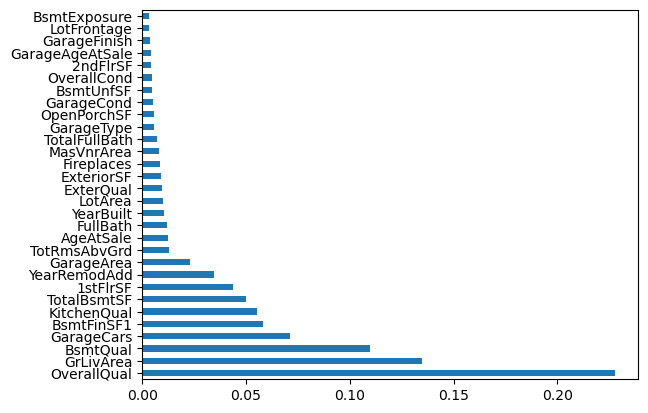

In [23]:
featureimportances = pd.Series(rf.feature_importances_, index = X_train.columns)
featureimportances.nlargest(30).plot(kind = 'barh')

In [24]:
featureimportances

GrLivArea          0.134642
MSSubClass         0.002664
MSZoning           0.000817
LotFrontage        0.003433
LotArea            0.010131
                     ...   
ExteriorSF         0.008864
AgeAtSale          0.012261
TotalFullBath      0.006991
TotalHalfBath      0.000955
GarageAgeAtSale    0.004119
Length: 83, dtype: float64

<AxesSubplot:ylabel='Frequency'>

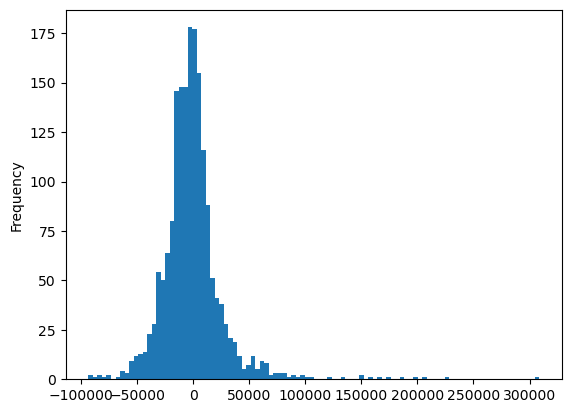

In [25]:
residuals = y_validate - rf.predict(X_validate)
residuals.plot.hist(bins=100)

In [26]:
np.mean(residuals**2)

756415836.0155805

In [27]:
np.sqrt(np.mean(residuals**2))

27503.015035002627

**2.3.a.** Observations:
- We already have good R^2, but the feature importances suggest that this is primarily being driven by an indicator of overall quality of the house's material and finish and features tracking square footage. 
- We will try to engineer the features to yield a model that has more insight into how fungible features impact sale price.
- Our overall approach will be to keep track of the features that we cannot change, but try to discretize them so that the model cannot simply encode the solution into (combinations of) continuous variables.

In [28]:
X_train.columns

Index(['GrLivArea', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

## 2.4. Feature Engineering

- Combine features and drop combined features to include in feature analysis.

**2.4.a.** Time since last remodel. 

In [29]:
housedf['TimeSinceLastWork'] = housedf['YrSold'] - housedf['YearRemodAdd']

**2.4.b.** Total SqFt & 2 Stories

In [30]:
housedf['TotalSF'] = housedf['GrLivArea'] + housedf['TotalBsmtSF']
housedf['2Stories'] = housedf['2ndFlrSF'] > 0

**2.4.c.** Basement

In [31]:
housedf['FinBsmt'] = (housedf.TotalBsmtSF - housedf.BsmtUnfSF) > 0
housedf['UnfBsmt'] = housedf['BsmtUnfSF'] > 0

In [32]:
housedf.drop(['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF'], axis = 1, inplace = True)

**2.4.d.** Bathrooms

- (`Halfbaths` / 2) + `FullBaths` = `TotalFullBath`
     - Where `Halfbaths` = `BsmtHalfBath` + `HalfBath`

In [33]:
housedf['TotalBathrooms'] = ((housedf['BsmtHalfBath'] + housedf['HalfBath']) / 2) + housedf['BsmtFullBath'] + housedf['FullBath']

housedf.drop(['BsmtHalfBath', 'HalfBath', 'BsmtFullBath', 'FullBath', 'TotalFullBath', 'TotalHalfBath'], axis = 1, inplace = True)

**2.4.e.** Outdoor Living

- `WoodDeckSF` + `OpenPorchSF` + `EnclosedPorch` + `3SsnPorch` + `ScreenPorch` = `OutdoorLiving`
- Convert to boolean.

In [34]:
housedf['OutdoorLiving'] = housedf['WoodDeckSF'] + housedf['OpenPorchSF'] + housedf['EnclosedPorch'] + housedf['3SsnPorch'] + housedf['ScreenPorch']
housedf['OutdoorLiving'] = housedf['OutdoorLiving'] > 0

housedf.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis = 1, inplace = True)

**2.4.f.**  Pool Area

- `HasPool` is the boolean value of `PoolArea`.

In [35]:
housedf['PoolArea'].value_counts()

0      2570
144       1
800       1
519       1
444       1
648       1
228       1
561       1
576       1
368       1
Name: PoolArea, dtype: int64

In [36]:
housedf['HasPool'] = housedf['PoolArea'] > 0

housedf.drop(['PoolArea', 'PoolQC'], axis = 1, inplace = True)

**2.4.g.** Fireplaces

In [37]:
housedf['HasFireplace'] = housedf['Fireplaces'] > 0

housedf.drop(['FireplaceQu', 'Fireplaces'], axis = 1, inplace = True)

In [38]:
housedf.shape

(2579, 74)

In [39]:
housedf.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'ExteriorSF', 'AgeAtSale',
       'GarageAgeAtSale', 'TimeSinceLastWo

## 2.5. Feature Analysis

**2.5.a.** Use the following methods for feature exploration and discovery of which are more important:

- Random Feature Subset Analysis: Use a random subset of features to train and score models to see if there is a combination of features that gives a high R Squared. 
- `VarianceThreshold()`: Discover features with the least amount of variance with `VarianceThreshold()`. If the feature has low variance, this feature may not help us identify an increase in `SalePrice`.

- `KChooseBest`: Univariate feature selection with F test with `f_regression`. If the feature has a high F value and low p-value, that may be an indicator that feature will have a statistically significant effect on `y`.

- `SequentialFeatureSelector`: Forward selection of features to form a feature subset in a greedy fashion. The random forest estimmator is used to choose the best feature to add or remove based on the cross-validation score, R-Squared.

**Note:** We will use `X_train` to do all analysis on feature selection to prevent bias.

#### 2.5.b. Random Feature Subset Analysis
 - Besides the saturated un-engineered model, in order to benchmark our feature selection process we will train and score models on random subsets of the features.

In [40]:
from sklearn.model_selection import train_test_split
X_trainvalidate, X_test, y_trainvalidate, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validate, y_train, y_validate = train_test_split(X_trainvalidate, y_trainvalidate, test_size=0.875) # yields 70%/10%/20% split

In [41]:
import random
featurelist = X_train.columns.to_list()
rf = RandomForestRegressor()
subsetsize = 15

subsetscores = []

for _ in range(10):
    featuresubset = random.sample(featurelist, subsetsize)
    rf.fit(X_train[featuresubset], y_train)
    score = rf.score(X_validate[featuresubset], y_validate)
    subsetscores.append([featuresubset, score])

for featscore in subsetscores:
    print(featscore)

[['OverallCond', 'Fence', '1stFlrSF', 'Exterior1st', 'TotalBsmtSF', '2ndFlrSF', 'KitchenAbvGr', 'RoofMatl', 'BldgType', 'Functional', 'TotRmsAbvGrd', 'Condition1', 'PavedDrive', 'TotalHalfBath', 'YrSold'], 0.7158490144006262]
[['BldgType', 'OpenPorchSF', 'Utilities', 'GarageAgeAtSale', 'BsmtFinType1', 'Neighborhood', 'MasVnrArea', 'KitchenAbvGr', 'LotShape', 'ExterCond', 'ExteriorSF', 'YrSold', 'BsmtFinSF2', 'RoofMatl', '1stFlrSF'], 0.6440576288352364]
[['1stFlrSF', 'Condition2', 'Exterior2nd', 'LandSlope', 'HouseStyle', 'CentralAir', 'BsmtCond', 'GarageType', 'MiscVal', 'FullBath', 'Functional', 'LotArea', 'MSZoning', 'HalfBath', 'MasVnrType'], 0.6459541127998483]
[['YearBuilt', 'LandSlope', 'MoSold', 'SaleType', 'TotalFullBath', 'ExteriorSF', 'HouseStyle', 'SaleCondition', 'OverallCond', 'ExterCond', 'FireplaceQu', 'YearRemodAdd', 'MSSubClass', 'BedroomAbvGr', '1stFlrSF'], 0.7395539297938277]
[['FireplaceQu', 'Fireplaces', '1stFlrSF', 'GarageFinish', 'TotalFullBath', 'LowQualFinSF', 

In [42]:
y = housedf["SalePrice"]
X = housedf.drop("SalePrice", axis = 1)

In [43]:
from sklearn.model_selection import train_test_split
X_trainvalidate, X_test, y_trainvalidate, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validate, y_train, y_validate = train_test_split(X_trainvalidate, y_trainvalidate, test_size=0.875) # yields 70%/10%/20% split

In [44]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)

(257, 73)
(1806, 73)
(516, 73)


In [45]:
# pickle df to use in ML Project - 3. Modeling
housedf.to_pickle("housedf.pkl")

#### **2.5.c.** `VarianceThreshold()`

In [46]:
import sklearn.feature_selection as fs
varied_features = fs.VarianceThreshold(threshold = 0.25)
x_varied = varied_features.fit_transform(X_train)
x_varied.shape

(257, 57)

- `get_support` returns a boolean array.
    - If `True`, that feature has a variance greater than 0.25 indicating high variance and would be a meaningful predictor.  
    - If `False`, that feature has a variance less than 0.25 indicating low variance and would not be a meaningful predictor.

In [47]:
fs.VarianceThreshold.get_support(varied_features)

array([ True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False, False,
       False])

- Find the features that have low variance, values that have a variance less than 0.25 and returned `False` in the above boolean array.

In [48]:
concol = [column for column in X_train.columns 
          if column not in X_train.columns[varied_features.get_support()]]

for features in concol:
    print(features)

Street
Alley
Utilities
LandSlope
Condition2
Heating
CentralAir
KitchenAbvGr
PavedDrive
MiscFeature
2Stories
FinBsmt
UnfBsmt
OutdoorLiving
HasPool
HasFireplace


In [49]:
housedf['2Stories'].value_counts()

False    1464
True     1115
Name: 2Stories, dtype: int64

Observations from feature `VarianceThreshold` analysis:

The following features have low variance and may not have a distinguishable effect on `SalePrice`:

- Features Regarding Location:
    - `Street`, `Condition2`
- Features Regarding Lot:
    - `Alley`, `LandSlope`
- Features Regarding Utilities:
    - `Utilities`, `Heating`, `CentralAir`
- Features Regrading Basement:
    - `FinBsmt`, `UnfBsmt`
- Features Regarding Bathrooms:
    - `BsmtHalfBath`, `Halfbath`
- Features Regarding Misc:
    - `HasPool`, `HasFirePlace`, `OutdoorLiving`, `KitchAbvGr`, `MiscFeature`,`2Stories`
    
This indicates we may want to drop these features or combine them with another feature. 

#### **2.5.d.** `f_regression`

   - Univariate feature selection with F test with `f_regression`. If the feature has a high F value and low p-value, that may be an indicator that feature will have a statistically significant effect on `y`.
   - **Note:** This is a linear model for testing the effect of a single independent feature on the dependent variable. It assumes linearity, and therefore this is used for feature analysis. 

   - Use `k` equal to `all` to select all features instead of top `k` features that score best for exploratory purposes.

In [50]:
skb = fs.SelectKBest(score_func = fs.f_regression, k = 'all')

In [51]:
best_feats = skb.fit_transform(X_train, y_train)

In [52]:
p_vals = skb.pvalues_

- Print all `pvalues_` to explore which features are significant (< 0.05) and which are not (> 0.05).

In [53]:
for i in range(len(skb.pvalues_)):
 print('%s: %f' % (X_train.columns[i], skb.pvalues_[i]))

GrLivArea: 0.000000
MSSubClass: 0.103913
MSZoning: 0.000166
LotFrontage: 0.000773
LotArea: 0.000000
Street: 0.280504
Alley: 0.026267
LotShape: 0.000022
LandContour: 0.597905
Utilities: 1.000000
LotConfig: 0.453040
LandSlope: 0.074309
Neighborhood: 0.001587
Condition1: 0.430599
Condition2: 0.277374
BldgType: 0.262656
HouseStyle: 0.025375
OverallQual: 0.000000
OverallCond: 0.151414
YearBuilt: 0.000000
YearRemodAdd: 0.000000
RoofStyle: 0.000449
RoofMatl: 0.000000
Exterior1st: 0.099040
Exterior2nd: 0.098560
MasVnrType: 0.001889
MasVnrArea: 0.000000
ExterQual: 0.000000
ExterCond: 0.044883
Foundation: 0.000000
BsmtQual: 0.000000
BsmtCond: 0.090361
BsmtExposure: 0.000000
BsmtFinType1: 0.001314
BsmtFinType2: 0.291918
Heating: 0.150626
HeatingQC: 0.000000
CentralAir: 0.000004
Electrical: 0.000023
1stFlrSF: 0.000000
2ndFlrSF: 0.000000
LowQualFinSF: 0.197803
BedroomAbvGr: 0.000054
KitchenAbvGr: 0.093161
KitchenQual: 0.000000
TotRmsAbvGrd: 0.000000
Functional: 0.075077
GarageType: 0.000000
GarageF

Observations from `f_regression` p-values.

The following features have a `p-value_` of 0.05 or higher, so these will not have a significant effect on prediciting `SalePrice`:

- `LandContour`: 0.446418
- `Utilities`: 0.088177
- `Condition2`: 0.202088
- `MiscVal`: 0.323951
- `MoSold`: 0.640976
- `YrSold`: 0.818901
- `SaleType`: 0.792826

- Now use `SelectKBest` using `k = 10` to select the top 10 features that have the highest F-score and lowest p-values.

In [54]:
skb = fs.SelectKBest(score_func = fs.f_regression, k = 10)

In [55]:
best_feats = skb.fit_transform(X_train, y_train)

In [56]:
concol = [column for column in X.columns 
          if column in X.columns[skb.get_support()]]

for features in concol:
    print(features)

GrLivArea
OverallQual
MasVnrArea
ExterQual
1stFlrSF
KitchenQual
GarageCars
GarageArea
TotalSF
TotalBathrooms


#### **2.5.c.** `SequentialFeatureSelector`

In [57]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

In [58]:
rf = RandomForestRegressor()

In [59]:
sfs = SequentialFeatureSelector(estimator = rf, n_features_to_select = 'auto', tol=0.005, 
                                direction = 'backward', scoring = "r2", cv = 5)

In [60]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=RandomForestRegressor(),
                          n_features_to_select='auto', scoring='r2', tol=0.005)

In [61]:
sfs.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True])

In [62]:
rf.fit(sfs.transform(X_train), y_train).score(sfs.transform(X_validate), y_validate)

0.8459497815918791

In [63]:
sfs.transform(X_train).shape

(257, 72)

In [64]:
selected_feat = X_train.columns[(sfs.get_support())]
print(selected_feat)

Index(['GrLivArea', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'ExteriorSF', 'AgeAtSale', 'GarageAgeAtSale',
       'TimeSinceLastWork', '2Storie

In [65]:
housedf.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'ExteriorSF', 'AgeAtSale',
       'GarageAgeAtSale', 'TimeSinceLastWo

### 2.5.d. Feature Analysis Summary

#### Feature Exclusion

`VarianceThreshold()` Features that has *LOW* variance (ones we should exclude or combine):

- `Street`
- `Alley`
- `Utilities`
- `LandSlope`
- `Condition2`
- `RoofMatl`
- `Heating`
- `CentralAir`
- `KitchenAbvGr`
- `MiscFeature`
- `2Stories`
- `FinBsmt`
- `UnfBsmt`
- `OutdoorLiving`
- `HasPool`
- `HasFireplace`

`f_regression` Features that have a *HIGH* p-value (ones we should exclude or combine):

- `LandContour`: 0.446418
- `Utilities`: 0.088177
- `Condition2`: 0.202088
- `MiscVal`: 0.323951
- `MoSold`: 0.640976
- `YrSold`: 0.818901
- `SaleType`: 0.79282

Features that both `VarianceThreshold()` and `f_regression` methods told us to exclude:

- `Utitities`
- `Condition2`

#### Feature Inclusion

Since `VarianceThreshold()` has multiple features with high variance that are too numerous to list, we will jump into which features `SelectKBest` with `f_regression` told us we should include.

`f_regression` Top 10 Features:

- `GrLivArea`
- `OverallQual`
- `ExterQual`
- `BsmtQual`
- `TotalBsmtSF`
- `1stFlrSF`
- `KitchenQual`
- `GarageCars`
- `GarageArea`
- `TotalFullBath`

`SequentialFeatureSelection` Features:

- `Neighborhood` 
- `OverallQual`
- `OverallCond` 
- `YearBuilt`
- `BsmtFinType1`
- `1stFlrSF`
- `GarageCars`
- `ExteriorSF`
- `TotalSF`
- `TotalFullBath`

Features both methods had in common to include:

- `OverallQual`
- `1stFlrSF`
- `GarageCars`
- `TotalFullBath`

### For the modeling portion, please reference `ML Project - 3. Modeling` which is the third notebook of the three part series.